In [69]:
import random
from functions.FE import FE
from fitness import Classifier
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
from deap import base, creator, tools, algorithms

In [70]:
functionalExp = FE()
iris = pd.read_csv("iris.data", sep=",")
irisAtts = iris.drop("class", 1)
target = iris["class"]

#Scale to [0,1] before expanding
scaledIris = MinMaxScaler().fit_transform(irisAtts)
model = Classifier(target, 10, 5)


In [71]:
ncols = scaledIris.shape[1]

In [72]:
def fitnessFunction(individual):
    data = functionalExp.expandMatrix(scaledIris, individual)
    return (model.knn(data),)
    

In [86]:
def mutateIndividual(individual, indpb):
    xmen = []
    for ind in individual:
        if(random.uniform(0,1) <= indpb):
            xmen.append((random.randint(1, 7), random.randint(1, 7)))
        else:
            xmen.append(ind)
            
    return (creator.Individual(xmen),)

In [61]:
mutateIndividual([(1,2), (3,4), (7,3), (2,3)], 0.25)

[(1, 2), (3, 4), (7, 3), (5, 3)]

In [22]:
print(fitnessFunction( [(1,4) for x in range(4)]))

(0.96666666666666656,)


In [90]:
print(creator.create("FitnessMax", base.Fitness, weights=(1.0,)))
creator.create("Individual", list, fitness=creator.FitnessMax)


None


/home/abd/Workspace/darmpy/darmpy/lib/python3.5/site-packages/deap-1.1.0-py3.5-linux-x86_64.egg/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/home/abd/Workspace/darmpy/darmpy/lib/python3.5/site-packages/deap-1.1.0-py3.5-linux-x86_64.egg/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


In [92]:
toolbox = base.Toolbox()
toolbox.register("createPair",  lambda : (random.randint(1, 7), random.randint(1, 7)))
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.createPair, n=ncols)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

pair = toolbox.createPair()
ind = toolbox.individual()
pop = toolbox.population(n=21)

print("pair is of type %s and has value\n%s" % (type(pair), pair))
print("ind is of type %s and contains %d pairs\n%s" % (type(ind), len(ind), ind))
print("pop is of type %s and contains %d individuals\n%s" % (type(pop), len(pop), pop))

pair is of type <class 'tuple'> and has value
(1, 3)
ind is of type <class 'deap.creator.Individual'> and contains 4 pairs
[(1, 2), (2, 7), (6, 3), (7, 6)]
pop is of type <class 'list'> and contains 21 individuals
[[(2, 7), (3, 4), (3, 6), (5, 5)], [(2, 3), (7, 3), (2, 6), (6, 6)], [(4, 2), (7, 7), (6, 5), (1, 2)], [(3, 1), (5, 1), (1, 5), (5, 7)], [(7, 5), (3, 7), (3, 5), (2, 2)], [(7, 2), (1, 7), (3, 5), (2, 6)], [(3, 3), (4, 7), (3, 7), (2, 3)], [(2, 7), (6, 2), (6, 5), (7, 1)], [(2, 7), (2, 5), (7, 6), (4, 1)], [(1, 4), (1, 3), (6, 3), (6, 6)], [(6, 3), (7, 7), (3, 4), (7, 6)], [(7, 6), (3, 2), (5, 2), (3, 7)], [(3, 2), (3, 4), (1, 1), (6, 3)], [(1, 4), (2, 2), (1, 5), (7, 2)], [(7, 1), (7, 6), (3, 3), (6, 4)], [(4, 4), (7, 3), (2, 5), (2, 2)], [(7, 4), (1, 2), (5, 7), (1, 4)], [(5, 2), (1, 7), (7, 2), (3, 6)], [(4, 5), (2, 3), (2, 5), (1, 1)], [(6, 2), (4, 1), (3, 3), (5, 6)], [(3, 1), (6, 5), (5, 7), (2, 4)]]


In [76]:
toolbox.register("evaluate", fitnessFunction)
toolbox.register("mate", tools.cxOnePoint)



In [87]:
toolbox.register("mutate", mutateIndividual, indpb=1.0/ncols)
toolbox.register("select", tools.selTournament, tournsize=3)

In [88]:
def main():
    import numpy
    
    pop = toolbox.population(n=21)
    hof = tools.HallOfFame(2)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", numpy.mean)
    stats.register("min", numpy.min)
    stats.register("max", numpy.max)
    
    pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=0.9, mutpb=0.1, ngen=10*ncols, stats=stats, halloffame=hof, verbose=True)
    
    return pop, logbook, hof

gen	nevals	avg     	min     	max     
0  	21    	0.947619	0.873333	0.973333
1  	18    	0.953968	0.926667	0.98    
2  	18    	0.96254 	0.946667	0.98    
3  	20    	0.967937	0.946667	0.98    
4  	19    	0.972698	0.953333	0.98    
5  	18    	0.973333	0.946667	0.98    
6  	18    	0.97619 	0.953333	0.98    
7  	20    	0.974921	0.933333	0.98    
8  	20    	0.97873 	0.953333	0.98    
9  	20    	0.97746 	0.94    	0.98    
10 	20    	0.98    	0.98    	0.98    
11 	17    	0.976508	0.933333	0.98    
12 	20    	0.98    	0.98    	0.98    
13 	18    	0.979365	0.966667	0.98    
14 	18    	0.975556	0.933333	0.98    
15 	20    	0.97619 	0.946667	0.98    
16 	18    	0.979048	0.966667	0.98    
17 	18    	0.97873 	0.953333	0.98    
18 	18    	0.977143	0.946667	0.98    
19 	20    	0.98    	0.98    	0.98    
20 	20    	0.979683	0.973333	0.98    
21 	19    	0.97873 	0.953333	0.98    
22 	20    	0.98    	0.98    	0.98    
23 	18    	0.97873 	0.966667	0.98    
24 	18    	0.978413	0.946667	0.98    
25 	20    	0

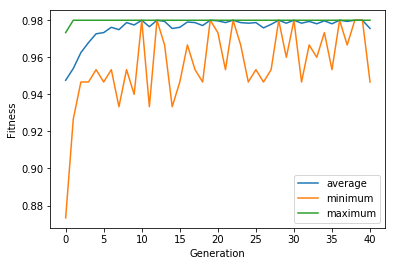

In [89]:
if __name__ == "__main__":
    pop, log, hof = main()
    print("Best individual is: %s\nwith fitness: %s" % (hof[0], hof[0].fitness))
    
    import matplotlib.pyplot as plt
    gen, avg, min_, max_ = log.select("gen", "avg", "min", "max")
    plt.plot(gen, avg, label="average")
    plt.plot(gen, min_, label="minimum")
    plt.plot(gen, max_, label="maximum")
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.legend(loc="lower right")
    plt.show()